In [1]:
#The price shown is in U.S. Dollars per pound. The current price of sugar as of December 03, 2021 is $0.1875 per pound.

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df  = pd.read_csv(r'C:\Users\jayes\Downloads\sugar-prices-historical-chart-data.csv',skiprows=16) # This means it expected only 1 field in the CSV file but it saw 12 values in line 16 so i used skip rows to avoid this error

In [4]:
df

,1962-11-29,0.0389
0,1962-11-30,0.0384
1,1962-12-03,0.0387
2,1962-12-04,0.0380
3,1962-12-05,0.0375
4,1962-12-06,0.0382
...,...,...
14782,2021-12-20,NaN
14783,2021-12-21,NaN
14784,2021-12-22,NaN
14785,2021-12-23,NaN


In [5]:
df.columns = ['date', 'sugar price in dollars'] #renaming the columns in proper fashion

In [6]:
df.head()

,date,sugar price in dollars
0,1962-11-30,0.0384
1,1962-12-03,0.0387
2,1962-12-04,0.0380
3,1962-12-05,0.0375
4,1962-12-06,0.0382


In [7]:
df.tail()

,date,sugar price in dollars
14782,2021-12-20,NaN
14783,2021-12-21,NaN
14784,2021-12-22,NaN
14785,2021-12-23,NaN
14786,2021-12-24,NaN


In [8]:
df.isnull().sum().sum()

21

In [9]:
# as we can see there are almost  0.15% of null values so we can simply avoid this : (21/14000)*100 cause if we try to fill 
# these null values the distrbution of the data might change, so if we have only 0.15% we can avoid this !

#null values greater than 5% would have affected the data but since its only 0.15% null values we can neglect this!

In [10]:
df = df.dropna()

In [11]:
sugar_price_in_rupees = []
for i in df['sugar price in dollars']:
    i = i*75.44
    sugar_price_in_rupees.append(i)

In [12]:
df['sugar_price_in_rupees'] = sugar_price_in_rupees

In [13]:
df.head()

,date,sugar price in dollars,sugar_price_in_rupees
0,1962-11-30,0.0384,2.896896
1,1962-12-03,0.0387,2.919528
2,1962-12-04,0.0380,2.866720
3,1962-12-05,0.0375,2.829000
4,1962-12-06,0.0382,2.881808


In [14]:
df.tail()

,date,sugar price in dollars,sugar_price_in_rupees
14761,2021-11-29,0.1919,14.476936
14762,2021-11-30,0.1860,14.031840
14763,2021-12-01,0.1860,14.031840
14764,2021-12-02,0.1862,14.046928
14765,2021-12-03,0.1875,14.145000


In [15]:
df = df.drop(['sugar price in dollars'],axis=1)

In [21]:
df['sugar_price_in_rupees'] = sugar_price_in_rupees

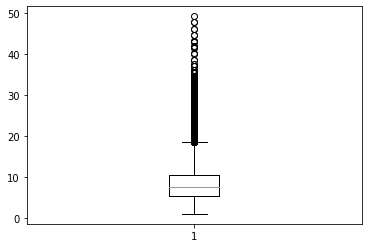

In [22]:
fig, ax = plt.subplots()
ax.boxplot(sugar_price_in_rupees)
plt.show()

In [23]:
df = df.set_index('date')

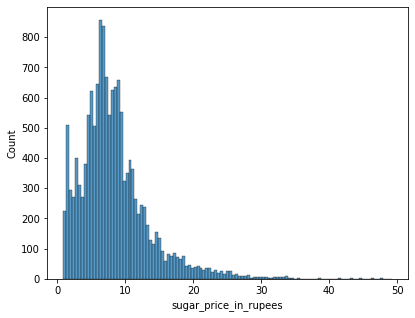

In [24]:
plt.figure(figsize=(22,17))
for i, column in enumerate(df.columns , 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column]) 
#we can see only the x axis scale has changed

<AxesSubplot:xlabel='date'>

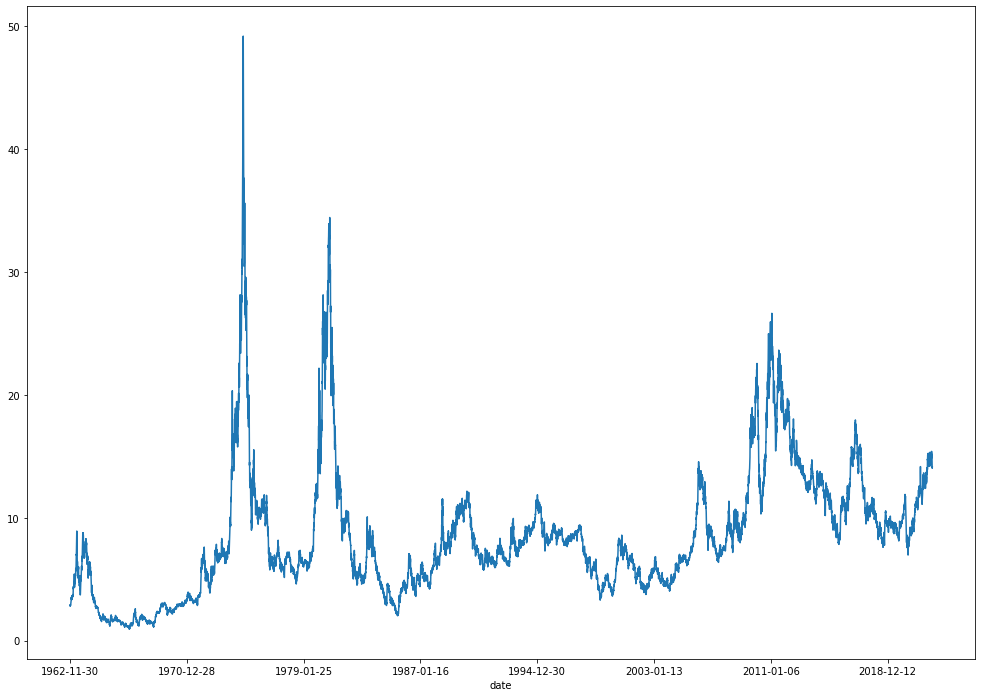

In [25]:
plt.figure(figsize=(17,12))
df['sugar_price_in_rupees'].plot()

In [26]:
#We interpret this result using the p-value from the test. 
#A p-value below a threshold (such as 5% ) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests
#we fail to reject the null hypothesis (non-stationary)

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['sugar_price_in_rupees'])
print('p-value: %f' % result[1])

p-value: 0.003062


In [28]:
#we can see the p-value is less than threshold so we reject the null hypothesis i.e the data is stationary .


# if data was not stationary i would have used some transformations like simple shifting , log shifting , power shifting etc
# to make the data stationary

 
#and most important if we take a look on the distrbution of the data , it is positively  skewed so I think log transformation
# would have worked properly .

In [29]:
df.head()

,sugar_price_in_rupees
date,
1962-11-30,2.896896
1962-12-03,2.919528
1962-12-04,2.866720
1962-12-05,2.829000
1962-12-06,2.881808


In [30]:
df.tail()

,sugar_price_in_rupees
date,
2021-11-29,14.476936
2021-11-30,14.031840
2021-12-01,14.031840
2021-12-02,14.046928
2021-12-03,14.145000


In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

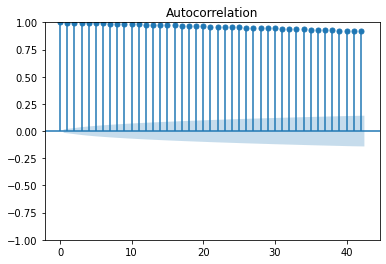

In [32]:
plot_acf(df)
pyplot.show()

In [33]:
df.columns

Index(['sugar_price_in_rupees'], dtype='object')

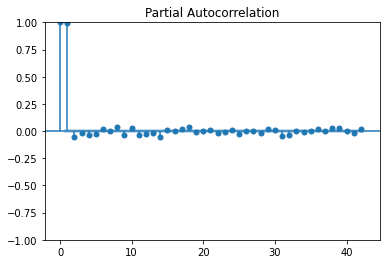

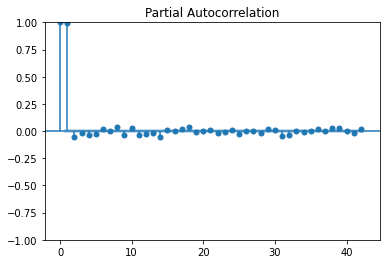

In [34]:
plot_pacf(df)

In [35]:
print('mean of data is : ',df.mean())
print('variance of data is : ',df.var())

mean of data is :  sugar_price_in_rupees    8.478756
dtype: float64
variance of data is :  sugar_price_in_rupees    27.109419
dtype: float64


In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
from pmdarima import auto_arima
import pmdarima as pm

In [38]:
model = pm.auto_arima(df ,seasonal=False ,start_p = 0,
  start_q = 0, d=1 , max_p = 5, max_q = 5, max_d=5,start_P = 1,start_Q = 1,
                   m=12,
                   start_D = 1,
                   max_P = 2,
                   max_Q = 2,
                   max_D = 3, 
                   n_fits=15,
                   random_state=22
                  )

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14766
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1644.034
Date:                Fri, 10 Dec 2021   AIC                           3302.069
Time:                        14:04:58   BIC                           3355.269
Sample:                             0   HQIC                          3319.733
                              - 14766                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5186      0.019    -79.253      0.000      -1.556      -1.481
ar.L2         -0.6648      0.018    -35.958      0.000      -0.701      -0.629
ar.L3          0.0922      0.005     17.525      0.000       0.082       0.103
ar.L4          0.0546      0.003     16.537      0.000       0.048       0.061
ma.L1          1.5773      0.019     83.577      0.000       1.540       1.614
ma.L2          0.7694      0.019     40.666      0.000       0.732       0.806
sigma2         0.0732      0.000    258.628      0.000       0.073       0.074
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            163839.55
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
df.shape

(14766, 1)

In [41]:
train = df.iloc[:14000]
train.shape

(14000, 1)

In [42]:
test = df.iloc[14000:]
test.shape

(766, 1)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df,order = (4, 1, 2))

C:\Users\jayes\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\jayes\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [44]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     sugar_price_in_rupees   No. Observations:                14766
Model:                  SARIMAX(4, 1, 2)   Log Likelihood               -1644.034
Date:                   Fri, 10 Dec 2021   AIC                           3302.069
Time:                           14:05:11   BIC                           3355.269
Sample:                                0   HQIC                          3319.733
                                 - 14766                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5186      0.019    -79.253      0.000      -1.556      -1.481
ar.L2         -0.6648      0.018    -35.958      0.000      -0.701      -0.629
ar.L3          0.0922      0.005     17.525      0.000       0.082       0.103
ar.L4          0.0546      0.003     16.537      0.000       0.048       0.061
ma.L1          1.5773      0.019     83.577      0.000       1.540       1.614
ma.L2          0.7694      0.019     40.666      0.000       0.732       0.806
sigma2         0.0732      0.000    258.628      0.000       0.073       0.074
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            163839.55
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
predictions = result.predict().rename("Predictions")

In [46]:
df['predictions'] = predictions

In [47]:
df.head()

,sugar_price_in_rupees,predictions
date,,
1962-11-30,2.896896,0.000000
1962-12-03,2.919528,2.896896
1962-12-04,2.866720,2.920788
1962-12-05,2.829000,2.864196
1962-12-06,2.881808,2.826783


In [48]:
df.tail()

,sugar_price_in_rupees,predictions
date,,
2021-11-29,14.476936,14.570723
2021-11-30,14.031840,14.457308
2021-12-01,14.031840,14.004413
2021-12-02,14.046928,14.008663
2021-12-03,14.145000,14.057836
